## Toponyms Correspondence Analysis

#### Import the necessary modules and libraries to the project

In [148]:
# Import necessary libraries
import os
import sys
import importlib

In [ ]:
# Sets the root directory of the project as the working directory
os.chdir('..')

In [ ]:
# Check the current working directory
os.getcwd()

In [153]:
# Import necessary modules
from libs.prep_data_dirs import *
from libs.toponyms_analysis import *

In [ ]:
from importlib import reload

reload(sys.modules['libs.prep_data_dirs'])
reload(sys.modules['libs.toponyms_analysis'])

#### Load the POIs with toponyms from OSM

In [8]:
#define the file path of the GeoJSON file with toponyms retrieved from OSM
file_path = 'roi/poi_osm/poi_osm.geojson'

#load the GeoJSON file into a GeoDataFrame
poi_gdf = load_geojson(file_path)


File loaded successfully from: roi/poi_osm/poi_osm.geojson

First records of the GeoDataFrame:



,addr:city,addr:housenumber,addr:postcode,addr:street,addr:suburb,amenity,name,parking,building,building:levels,...,2014worldcup,lit,bicycle_parking,covered,payment:cash,name:en,diet:gluten_free,toilets:wheelchair,study_case,geometry
0,None,2069,None,Avenida República Argentina,None,hospital,Hospital IPO,None,None,None,...,None,None,None,None,None,None,None,None,case12,POINT (-49.29101 -25.46488)
1,None,860,None,Avenida Água Verde,None,None,Condor Supermercados,None,yes,None,...,None,None,None,None,None,None,None,None,case7,POINT (-49.28006 -25.45228)
2,None,394,None,Rua Petit Carneiro,None,pub,Tiki Taka Gastrobar,None,yes,None,...,None,None,None,None,None,None,None,None,case5,POINT (-49.28094 -25.44977)
3,None,None,None,None,None,pharmacy,Panvel,None,None,None,...,None,None,None,None,None,None,None,None,case4,POINT (-49.28124 -25.44649)
4,None,714,None,Avenida Água Verde,None,bank,Itaú,None,None,None,...,None,None,None,None,None,None,None,None,case8,POINT (-49.27822 -25.45278)


In [10]:
# Filter and organize the GeoDataFrame
poi_filter_gdf = filter_gdf(poi_gdf)

# Display the GeoDataFrame filtered and organized
print("GeoDataFrame filtered and organized:")
display(poi_filter_gdf)

GeoDataFrame filtered and organized:


,study_case,name,geometry
0,case1,Colégio Estadual Barão do Rio Branco,POINT (-49.27638 -25.44261)
1,case2,Restaurante Yamato,POINT (-49.27823 -25.44534)
2,case3,Batatiba,POINT (-49.27738 -25.44556)
3,case4,Panvel,POINT (-49.28124 -25.44649)
4,case5,Tiki Taka Gastrobar,POINT (-49.28094 -25.44977)
5,case6,Bek's Bar,POINT (-49.27907 -25.45106)
6,case7,Condor Supermercados,POINT (-49.28006 -25.45228)
7,case8,Itaú,POINT (-49.27822 -25.45278)
8,case9,Bradesco,POINT (-49.27776 -25.45284)
9,case10,Paróquia Santuário Sagrado Coração de Jesus,POINT (-49.28116 -25.45290)


##### Spatial distribution of the POIs

In [8]:
# Calculate and the centroid of the filtered GeoDataFrame
centroid_coords = calculate_centroid(poi_filter_gdf.unary_union)

# Plot the filtered GeoDataFrame
plot_filtered_data(poi_filter_gdf,centroid_coords)

#### Load the CSV with toponyms extracted using the approach YOLOv11 + Keras-OCR framework

In [9]:
# Path to CSV files with toponyms detected using YOLOv5 + Keras-OCR
csv_mpl = 'results/sli_Yv11_keras-ocr/mpl_Yv11/txt_ext_mpl_Yv11-Keras.csv'
csv_gsv = 'results/sli_Yv11_keras-ocr/gsv_Yv11/txt_ext_gsv_Yv11-Keras.csv'

# Load csv files as Geodataframe
df_mpl, df_gsv = load_csv_files(csv_mpl, csv_gsv)

# Display the first records of each gdf
print("First records of the Mapillary gdf:")
display(df_mpl.head())
print("\n\nFirst records of the GSV gdf:")
display(df_gsv.head())

First records of the Mapillary gdf:


,Case,Image,Text,BBox
0,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)"
1,case1,1096928207482770.jpg,9608,"(242, 414, 270, 427)"
2,case1,1096928207482770.jpg,s,"(116, 110, 148, 130)"
3,case1,1096928207482770.jpg,vista,"(116, 110, 148, 130)"
4,case1,1096928207482770.jpg,ssw,"(116, 96, 163, 120)"




First records of the GSV gdf:


,Case,Image,Text,BBox
0,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,google,"(3, 616, 64, 638)"
1,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)"
2,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,google,"(589, 625, 639, 639)"
3,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,NaN,"(136, 254, 160, 263)"
4,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,NaN,"(204, 242, 227, 253)"


In [10]:
# List some cases of interest
cases_of_interest = ['case1', 'case2', 'case3', 'case4']

# Interate over each study case and print the first 5 records
for case in cases_of_interest:
    print(f"Firtst 5 records of {case}:")
    display(df_mpl[df_mpl['Case'] == case].head())
    print("\n")

Firtst 5 records of case1:


,Case,Image,Text,BBox
0,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)"
1,case1,1096928207482770.jpg,9608,"(242, 414, 270, 427)"
2,case1,1096928207482770.jpg,s,"(116, 110, 148, 130)"
3,case1,1096928207482770.jpg,vista,"(116, 110, 148, 130)"
4,case1,1096928207482770.jpg,ssw,"(116, 96, 163, 120)"




Firtst 5 records of case2:


,Case,Image,Text,BBox
130,case2,1124150254758313.jpg,tuga,"(578, 345, 624, 361)"
131,case2,1124150254758313.jpg,udo,"(578, 345, 624, 361)"
132,case2,1257472124668378.jpg,kocn,"(607, 327, 639, 348)"
133,case2,179141174112265.jpg,NaN,"(506, 354, 542, 371)"
134,case2,179141174112265.jpg,NaN,"(542, 368, 562, 378)"




Firtst 5 records of case3:


,Case,Image,Text,BBox
138,case3,1024191501448114.jpg,awidina,"(87, 388, 132, 407)"
139,case3,1366195333760375.jpg,caah,"(45, 229, 95, 253)"
140,case3,138120268309044.jpg,catl,"(113, 290, 147, 306)"
141,case3,161978455878045.jpg,bapioita,"(56, 357, 124, 388)"
142,case3,177988754236279.jpg,catl,"(113, 290, 147, 306)"




Firtst 5 records of case4:


,Case,Image,Text,BBox
166,case4,1079214252484754.jpg,nisse,"(30, 353, 62, 367)"
167,case4,134225628697570.jpg,curitiba,"(568, 552, 629, 572)"
168,case4,134225628697570.jpg,nese,"(73, 394, 101, 405)"
169,case4,1540720542802076.jpg,NaN,"(144, 354, 174, 365)"
170,case4,216986626624632.jpg,NaN,"(604, 373, 627, 383)"


In [11]:
# Display the number of records in each GeoDataFrame
print("Mapillary lenght: %s records, \nGSV lenght: %s records" % (len(df_mpl), len(df_gsv)))

Mapillary lenght: 318 records, 
GSV lenght: 167 records


##### Postprocessing of text extracted of Google Street View to remove 'google' copyrights text detected

In [12]:
# Remove text detected from google copyrights

# List of words to remove
words_to_remove = ['google', 'gooole','gooale', 'googe', 'goeg', 'goog', 'gocgle','oeg']

df_gsv = df_gsv[~df_gsv['Text'].isin(words_to_remove)]
display(df_gsv)

,Case,Image,Text,BBox
1,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)"
3,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,NaN,"(136, 254, 160, 263)"
4,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,NaN,"(204, 242, 227, 253)"
6,case1,img_14_mqsPObxcs4w8CjaKDACG3g.jpg,NaN,"(238, 486, 276, 497)"
10,case1,img_19_gZC_ll-KhVeg0J-AWTOGJA.jpg,NaN,"(411, 486, 448, 497)"
...,...,...,...,...
160,case9,img_332__mFENmdEnWHvu-bWNNrGMw.jpg,aliga,"(414, 265, 460, 295)"
161,case9,img_332__mFENmdEnWHvu-bWNNrGMw.jpg,esruluran,"(411, 230, 466, 262)"
162,case9,img_336_146KTqjtDr3u0qsu2bxqxg.jpg,NaN,"(238, 202, 297, 220)"
164,case9,img_336_146KTqjtDr3u0qsu2bxqxg.jpg,NaN,"(495, 260, 549, 277)"


In [13]:
# Display the size of gsv dataframe after postprocessing
len(df_gsv)

93

#### Retrieving image aquistion metadata

In [14]:
# File path to Mapillary and GSV image metadata
mpl_img_md_path = 'sli_roi/mapillary/mpl_md_gdf_filtered2.geojson'

gsv_img_md_path = 'sli_roi/gsv/gsv_image_aquisition.geojson'

#load GeoJSON as GeoDataframe
mpl_img_metadata_gdf = load_geojson(mpl_img_md_path)
gsv_img_metadata_gdf = load_geojson(gsv_img_md_path)



File loaded successfully from: sli_roi/mapillary/mpl_md_gdf_filtered2.geojson

First records of the GeoDataFrame:



,altitude,atomic_scale,camera_type,captured_at,compass_angle,computed_altitude,computed_compass_angle,computed_geometry,creator,exif_orientation,...,make,model,thumb_original_url,merge_cc,sequence,width,id,study_case,image_paths_path,geometry
0,925,0.989071,perspective,2019-08-16 13:34:33,66.7,1.995656,71.219647,"{'type': 'Point', 'coordinates': [-49.276129, ...","{'username': 'projevias', 'id': '1023162686800...",1,...,Imajing,Imajbox,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,3.676811e+18,PRYMtTT2z9PVxCLdoy94JH,1600,618575749119462,case1,./sli_roi/mapillary/case1/618575749119462.jpg,POINT (-49.27613 -25.44289)
1,921,0.991346,perspective,2019-08-02 15:48:51,340.8,2.013492,334.180648,"{'type': 'Point', 'coordinates': [-49.275793, ...","{'username': 'projevias', 'id': '1023162686800...",1,...,Imajing,Imajbox,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,1.386381e+18,zfwhivp31odvk74mb5043h,1600,300526861756530,case1,./sli_roi/mapillary/case1/300526861756530.jpg,POINT (-49.27579 -25.44279)
2,922,0.991444,perspective,2019-08-02 15:48:53,336.9,1.909187,335.552671,"{'type': 'Point', 'coordinates': [-49.275873, ...","{'username': 'projevias', 'id': '1023162686800...",1,...,Imajing,Imajbox,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,1.386381e+18,zfwhivp31odvk74mb5043h,1600,1111471812664672,case1,./sli_roi/mapillary/case1/1111471812664672.jpg,POINT (-49.27587 -25.44262)
3,923,0.955038,perspective,2019-08-16 17:53:41,335.7,2.070062,339.683723,"{'type': 'Point', 'coordinates': [-49.275807, ...","{'username': 'projevias', 'id': '1023162686800...",1,...,Imajing,Imajbox,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,3.922786e+18,9ejsoy6kthtgWC4W3bj6HU,1600,955248788627775,case1,./sli_roi/mapillary/case1/955248788627775.jpg,POINT (-49.27581 -25.44293)
4,923,0.957593,perspective,2019-08-16 17:54:11,342.1,1.905059,338.677912,"{'type': 'Point', 'coordinates': [-49.275967, ...","{'username': 'projevias', 'id': '1023162686800...",1,...,Imajing,Imajbox,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,3.922786e+18,tcol9khu4slsr6f4jxv1dv,1600,813500986258907,case1,./sli_roi/mapillary/case1/813500986258907.jpg,POINT (-49.27597 -25.44259)



File loaded successfully from: sli_roi/gsv/gsv_image_aquisition.geojson

First records of the GeoDataFrame:



,copyright,date,pano_id,status,lat,lng,layer,path,geometry
0,© Google,2024-04,UDNQ1pKf4L02n48MDR5siA,OK,-25.443029,-49.276429,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27643 -25.44303)
1,© Google,2024-04,tnaCaLzj7CLzwDybJaOl9w,OK,-25.442179,-49.276123,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27612 -25.44218)
2,© Google,2024-04,QVjoJ-4RqpPmZpfWXxDs_A,OK,-25.442266,-49.276083,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27608 -25.44227)
3,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27604 -25.44235)
4,© Google,2024-04,mqsPObxcs4w8CjaKDACG3g,OK,-25.442443,-49.276004,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27600 -25.44244)


In [15]:
# Join the GeoDataframes

# Prepare the column of the `df_mpl` before join with `mpl_img_metadata_gdf`
df_mpl['aux_join'] = df_mpl['Image'].str.replace(r'\.jpg$', '', regex=True)
df_mpl_merged = df_mpl.merge(mpl_img_metadata_gdf, how='left', left_on='aux_join', right_on='id')

# in the same way, prepare the column of the `df_gsv' to join the `gsv_img_metadata_gdf'
df_gsv['aux_join'] = df_gsv['Image'].str.replace(r'img_\d+_|\.jpg', '', regex=True)
df_gsv_merged = df_gsv.merge(gsv_img_metadata_gdf, how='left', left_on='aux_join', right_on='pano_id')

In [16]:
# Display the merged dataframes
print("DataFrame df_mpl merged with Mapillary Metadata:")
display(df_mpl_merged.head())

print("\nDataFrame df_gsv merged with GSV Metadata:")
display(df_gsv_merged.head())

DataFrame df_mpl merged with Mapillary Metadata:


,Case,Image,Text,BBox,aux_join,altitude,atomic_scale,camera_type,captured_at,compass_angle,...,make,model,thumb_original_url,merge_cc,sequence,width,id,study_case,image_paths_path,geometry
0,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,case1,1096928207482770.jpg,9608,"(242, 414, 270, 427)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,case1,1096928207482770.jpg,s,"(116, 110, 148, 130)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,case1,1096928207482770.jpg,vista,"(116, 110, 148, 130)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,case1,1096928207482770.jpg,ssw,"(116, 96, 163, 120)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None



DataFrame df_gsv merged with GSV Metadata:


,Case,Image,Text,BBox,aux_join,copyright,date,pano_id,status,lat,lng,layer,path,geometry
0,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27604 -25.44235)
1,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27604 -25.44235)
2,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,NaN,"(136, 254, 160, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27604 -25.44235)
3,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,NaN,"(136, 254, 160, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27604 -25.44235)
4,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,NaN,"(204, 242, 227, 253)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,case1_imgs_metadata,/Users/darlanmnunes/Dev/DSc_git/PhD_Thesis_Ste...,POINT (-49.27604 -25.44235)


In [17]:
# Display The new GeoDataframe sizes after join
print("Mapillary merged lenght: %s, \nGSV merged lenght: %s" % (len(df_mpl_merged), len(df_gsv_merged)))

Mapillary merged lenght: 339, 
GSV merged lenght: 101


In [18]:
# Clean unnecessary columns and records of the GeoDataframe merged

# 1. Remove records with null values in column 'Text'
# 2. Remove columns 'study_case' e 'image_paths_path'

df_mpl_cleaned = df_mpl_merged.dropna(subset=['Text']).drop(columns=['study_case', 'image_paths_path'])
df_gsv_cleaned = df_gsv_merged.dropna(subset=['Text']).drop(columns=['layer', 'path'])

# Display the first 5 records after cleaning
display("First records of df_mpl_cleaned:", df_mpl_cleaned.head())
display("First records of df_gsv_cleaned:", df_gsv_cleaned.head())

'First records of df_mpl_cleaned:'

,Case,Image,Text,BBox,aux_join,altitude,atomic_scale,camera_type,captured_at,compass_angle,...,exif_orientation,height,make,model,thumb_original_url,merge_cc,sequence,width,id,geometry
0,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,case1,1096928207482770.jpg,9608,"(242, 414, 270, 427)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,case1,1096928207482770.jpg,s,"(116, 110, 148, 130)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,case1,1096928207482770.jpg,vista,"(116, 110, 148, 130)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,case1,1096928207482770.jpg,ssw,"(116, 96, 163, 120)",1096928207482770,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


'First records of df_gsv_cleaned:'

,Case,Image,Text,BBox,aux_join,copyright,date,pano_id,status,lat,lng,geometry
0,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604 -25.44235)
1,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604 -25.44235)
16,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,aborto,"(183, 334, 217, 348)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,POINT (-49.28081 -25.45261)
17,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,contra,"(141, 334, 180, 349)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,POINT (-49.28081 -25.45261)
19,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,caeacase,"(53, 336, 105, 349)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,POINT (-49.28081 -25.45261)


In [19]:
# Check again the new GeoDataframe sizes
print("Mapillary cleaned lenght: %s, \nGSV cleaned lenght: %s" % (len(df_mpl_cleaned), len(df_gsv_cleaned)))

Mapillary cleaned lenght: 269, 
GSV cleaned lenght: 67


In [25]:
# Save the cleaned GeoDataframe to disk
df_mpl_cleaned.to_csv('results/sli_Yv11_keras-ocr/mpl_Yv11/mpl_cleaned-withSLIMetadata.csv', index=False)
df_gsv_cleaned.to_csv('results/sli_Yv11_keras-ocr/gsv_Yv11/gsv_cleaned-withSLIMetadata.csv', index=False)

In [15]:
# Reload the results (case needed)
df_mpl_cleaned = pd.read_csv('results/sli_Yv11_keras-ocr/mpl_Yv11/mpl_cleaned-withSLIMetadata.csv')
df_gsv_cleaned = pd.read_csv('results/sli_Yv11_keras-ocr/gsv_Yv11/gsv_cleaned-withSLIMetadata.csv')

# Display the first and last 5 records
display("First records of df_mpl_cleaned:", df_mpl_cleaned)
display("First records of df_gsv_cleaned:", df_gsv_cleaned)

'First records of df_mpl_cleaned:'

,Case,Image,Text,BBox,aux_join,altitude,atomic_scale,camera_type,captured_at,compass_angle,...,exif_orientation,height,make,model,thumb_original_url,merge_cc,sequence,width,id,geometry
0,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,case1,1096928207482770.jpg,9608,"(242, 414, 270, 427)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,case1,1096928207482770.jpg,s,"(116, 110, 148, 130)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,case1,1096928207482770.jpg,vista,"(116, 110, 148, 130)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,case1,1096928207482770.jpg,ssw,"(116, 96, 163, 120)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,case9,1382998822062610.jpg,bradesco,"(9, 409, 59, 434)",1382998822062610,935.167,0.893575,perspective,2019-04-28 11:27:08,0.0,...,1.0,3000.0,GoPro,HERO5 Black,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,1.765395e+18,Q8inLumSl5Eb4LDKRObQYQ,4000.0,1.382999e+15,POINT (-49.2780143 -25.4528646)
265,case9,1382998822062610.jpg,bradesco,"(9, 409, 59, 434)",1382998822062610,935.167,0.893575,perspective,2019-04-28 11:27:08,0.0,...,1.0,3000.0,GoPro,HERO5 Black,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,1.765395e+18,Q8inLumSl5Eb4LDKRObQYQ,4000.0,1.382999e+15,POINT (-49.2780143 -25.4528646)
266,case9,224682542757920.jpg,bradesco,"(543, 342, 583, 361)",224682542757920,925.000,0.970110,perspective,2019-08-16 12:45:02,291.3,...,1.0,1200.0,Imajing,Imajbox,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,2.173452e+18,gke2XSxR9NKBKdL3nDt7Eg,1600.0,2.246825e+14,POINT (-49.277633333333 -25.453138888889)
267,case9,804096767197900.jpg,bradesco,"(543, 342, 583, 361)",804096767197900,925.000,0.970086,perspective,2019-08-16 12:45:02,291.3,...,1.0,1200.0,Imajing,Imajbox,https://scontent.fbsb23-1.fna.fbcdn.net/m1/v/t...,2.173452e+18,gke2XSxR9NKBKdL3nDt7Eg,1600.0,8.040968e+14,POINT (-49.277633333333 -25.453138888889)


'First records of df_gsv_cleaned:'

,Case,Image,Text,BBox,aux_join,copyright,date,pano_id,status,lat,lng,geometry
0,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604354294271 -25.44235442330328)
1,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604354294271 -25.44235442330328)
2,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,aborto,"(183, 334, 217, 348)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,POINT (-49.28081283930357 -25.45260795430762)
3,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,contra,"(141, 334, 180, 349)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,POINT (-49.28081283930357 -25.45260795430762)
4,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,caeacase,"(53, 336, 105, 349)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,POINT (-49.28081283930357 -25.45260795430762)
...,...,...,...,...,...,...,...,...,...,...,...,...
62,case8,img_309_.jpg,itau,"(279, 144, 334, 176)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,case9,img_332__mFENmdEnWHvu-bWNNrGMw.jpg,uuran,"(427, 231, 465, 257)",_mFENmdEnWHvu-bWNNrGMw,© Google,2023-12,_mFENmdEnWHvu-bWNNrGMw,OK,-25.452935,-49.277974,POINT (-49.27797375367853 -25.45293476040241)
64,case9,img_332__mFENmdEnWHvu-bWNNrGMw.jpg,aliga,"(414, 265, 460, 295)",_mFENmdEnWHvu-bWNNrGMw,© Google,2023-12,_mFENmdEnWHvu-bWNNrGMw,OK,-25.452935,-49.277974,POINT (-49.27797375367853 -25.45293476040241)
65,case9,img_332__mFENmdEnWHvu-bWNNrGMw.jpg,esruluran,"(411, 230, 466, 262)",_mFENmdEnWHvu-bWNNrGMw,© Google,2023-12,_mFENmdEnWHvu-bWNNrGMw,OK,-25.452935,-49.277974,POINT (-49.27797375367853 -25.45293476040241)


#### Levenshtein metrics

##### Levenshtein distance and similarity percentage

In [11]:
# Display the filtered poi dataframe
display(poi_filter_gdf)

,study_case,name,geometry
0,case1,Colégio Estadual Barão do Rio Branco,POINT (-49.27638 -25.44261)
1,case2,Restaurante Yamato,POINT (-49.27823 -25.44534)
2,case3,Batatiba,POINT (-49.27738 -25.44556)
3,case4,Panvel,POINT (-49.28124 -25.44649)
4,case5,Tiki Taka Gastrobar,POINT (-49.28094 -25.44977)
5,case6,Bek's Bar,POINT (-49.27907 -25.45106)
6,case7,Condor Supermercados,POINT (-49.28006 -25.45228)
7,case8,Itaú,POINT (-49.27822 -25.45278)
8,case9,Bradesco,POINT (-49.27776 -25.45284)
9,case10,Paróquia Santuário Sagrado Coração de Jesus,POINT (-49.28116 -25.45290)


In [12]:
# Preprocess the oringinal toponyms in the column 'name' to the levenshtein analysis
# This preprocessing includes: converts the text to lowercase, removes accents, removes special characters, numbers and symbols

poi_preProcess = preprocess_dataframe(poi_filter_gdf, 'name')

In [13]:
# Results after preprocessing (cleaned_name)
display(poi_preProcess)

,study_case,name,geometry,cleaned_name
0,case1,Colégio Estadual Barão do Rio Branco,POINT (-49.27638 -25.44261),colegio estadual barao do rio branco
1,case2,Restaurante Yamato,POINT (-49.27823 -25.44534),restaurante yamato
2,case3,Batatiba,POINT (-49.27738 -25.44556),batatiba
3,case4,Panvel,POINT (-49.28124 -25.44649),panvel
4,case5,Tiki Taka Gastrobar,POINT (-49.28094 -25.44977),tiki taka gastrobar
5,case6,Bek's Bar,POINT (-49.27907 -25.45106),beks bar
6,case7,Condor Supermercados,POINT (-49.28006 -25.45228),condor supermercados
7,case8,Itaú,POINT (-49.27822 -25.45278),itau
8,case9,Bradesco,POINT (-49.27776 -25.45284),bradesco
9,case10,Paróquia Santuário Sagrado Coração de Jesus,POINT (-49.28116 -25.45290),paroquia santuario sagrado coracao de jesus


In [16]:
# Create a new GeoDataframe with the preprocessed toponyms (cleaned_name) separeted in subsets (cleaned_name_subterm)
exploded_osm_terms_df = explode_cleaned_names(poi_preProcess)

# Display the new GeoDataframe
display(exploded_osm_terms_df)

,study_case,subcase_id,name,cleaned_name,cleaned_name_subterm,geometry
0,case1,case1.1,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,colegio,POINT (-49.27638076529805 -25.44260618362698)
1,case1,case1.2,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,estadual,POINT (-49.27638076529805 -25.44260618362698)
2,case1,case1.3,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,barao,POINT (-49.27638076529805 -25.44260618362698)
3,case1,case1.4,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,do,POINT (-49.27638076529805 -25.44260618362698)
4,case1,case1.5,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,rio,POINT (-49.27638076529805 -25.44260618362698)
5,case1,case1.6,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,branco,POINT (-49.27638076529805 -25.44260618362698)
6,case2,case2.1,Restaurante Yamato,restaurante yamato,restaurante,POINT (-49.2782293 -25.4453382)
7,case2,case2.2,Restaurante Yamato,restaurante yamato,yamato,POINT (-49.2782293 -25.4453382)
8,case3,case3.1,Batatiba,batatiba,batatiba,POINT (-49.27738485249074 -25.445556234701897)
9,case4,case4.1,Panvel,panvel,panvel,POINT (-49.2812387 -25.4464894)


In [23]:
# Save the exploded_osm_terms_df

# Convert exploded_osm_terms_df to GeoDataFrames
exploded_osm_terms_gdf = gpd.GeoDataFrame(exploded_osm_terms_df, geometry='geometry')

exploded_osm_terms_gdf.to_file('roi/poi_osm/poi_osm_preProcess_subterms.geojson', driver='GeoJSON')

In [18]:
# Calculate the Levenshtein distance and similarity percentage for the Mapillary e GSV
mpl_lev_results = levenshtein_analysis2(df_mpl_cleaned, exploded_osm_terms_df, 'Text', 'study_case', 'Case', 'cleaned_name_subterm')
gsv_lev_results = levenshtein_analysis2(df_gsv_cleaned, exploded_osm_terms_df, 'Text', 'study_case', 'Case', 'cleaned_name_subterm')

In [19]:
# Display the results of Levenshtein metrics
print("Results of Levenshtein metrics for Mapillary:")
display(mpl_lev_results)

print("\n\nResults of Levenshtein metrics for GSV:")
display(gsv_lev_results)

Results of Levenshtein metrics for Mapillary:


,study_case,Image,Text,BBox,aux_join,altitude,atomic_scale,camera_type,captured_at,compass_angle,...,width,id,geometry,subcase_id,name,cleaned_name,cleaned_name_subterm,Text_detect_sli,levenshtein_distance,similarity_percentage
0,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,case1.1,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,colegio,alegre,4.0,42.857143
1,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,case1.2,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,estadual,alegre,8.0,0.000000
2,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,case1.3,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,barao,alegre,6.0,0.000000
3,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,case1.4,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,do,alegre,6.0,0.000000
4,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,case1.5,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,rio,alegre,6.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,case9,1382998822062610.jpg,bradesco,"(9, 409, 59, 434)",1382998822062610,935.167,0.893575,perspective,2019-04-28 11:27:08,0.0,...,4000.0,1.382999e+15,POINT (-49.2780143 -25.4528646),case9.1,Bradesco,bradesco,bradesco,bradesco,0.0,100.000000
916,case9,1382998822062610.jpg,bradesco,"(9, 409, 59, 434)",1382998822062610,935.167,0.893575,perspective,2019-04-28 11:27:08,0.0,...,4000.0,1.382999e+15,POINT (-49.2780143 -25.4528646),case9.1,Bradesco,bradesco,bradesco,bradesco,0.0,100.000000
917,case9,224682542757920.jpg,bradesco,"(543, 342, 583, 361)",224682542757920,925.000,0.970110,perspective,2019-08-16 12:45:02,291.3,...,1600.0,2.246825e+14,POINT (-49.277633333333 -25.453138888889),case9.1,Bradesco,bradesco,bradesco,bradesco,0.0,100.000000
918,case9,804096767197900.jpg,bradesco,"(543, 342, 583, 361)",804096767197900,925.000,0.970086,perspective,2019-08-16 12:45:02,291.3,...,1600.0,8.040968e+14,POINT (-49.277633333333 -25.453138888889),case9.1,Bradesco,bradesco,bradesco,bradesco,0.0,100.000000




Results of Levenshtein metrics for GSV:


,study_case,Image,Text,BBox,aux_join,copyright,date,pano_id,status,lat,lng,geometry,subcase_id,name,cleaned_name,cleaned_name_subterm,Text_detect_sli,levenshtein_distance,similarity_percentage
0,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604354294271 -25.44235442330328),case1.1,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,colegio,sulos,6.0,14.285714
1,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604354294271 -25.44235442330328),case1.2,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,estadual,sulos,7.0,12.500000
2,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604354294271 -25.44235442330328),case1.3,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,barao,sulos,5.0,0.000000
3,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604354294271 -25.44235442330328),case1.4,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,do,sulos,4.0,20.000000
4,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,POINT (-49.27604354294271 -25.44235442330328),case1.5,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,rio,sulos,4.0,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,case8,img_309_.jpg,itau,"(279, 144, 334, 176)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,case8.1,Itaú,itau,itau,itau,0.0,100.000000
148,case9,img_332__mFENmdEnWHvu-bWNNrGMw.jpg,uuran,"(427, 231, 465, 257)",_mFENmdEnWHvu-bWNNrGMw,© Google,2023-12,_mFENmdEnWHvu-bWNNrGMw,OK,-25.452935,-49.277974,POINT (-49.27797375367853 -25.45293476040241),case9.1,Bradesco,bradesco,bradesco,uuran,7.0,12.500000
149,case9,img_332__mFENmdEnWHvu-bWNNrGMw.jpg,aliga,"(414, 265, 460, 295)",_mFENmdEnWHvu-bWNNrGMw,© Google,2023-12,_mFENmdEnWHvu-bWNNrGMw,OK,-25.452935,-49.277974,POINT (-49.27797375367853 -25.45293476040241),case9.1,Bradesco,bradesco,bradesco,aliga,7.0,12.500000
150,case9,img_332__mFENmdEnWHvu-bWNNrGMw.jpg,esruluran,"(411, 230, 466, 262)",_mFENmdEnWHvu-bWNNrGMw,© Google,2023-12,_mFENmdEnWHvu-bWNNrGMw,OK,-25.452935,-49.277974,POINT (-49.27797375367853 -25.45293476040241),case9.1,Bradesco,bradesco,bradesco,esruluran,8.0,11.111111


##### Save the results

In [136]:
# Base output path to save the results

lev_results_base_path = 'results/Yv11_toponyms_corr_analysis/1_levenshetein_metrics/2nd_test_subterms'

In [ ]:
# Save the results as CSV files

# Salve the results as CSV files
mpl_lev_results.to_csv(os.path.join(lev_results_base_path, 'mpl_lev_subterms_results.csv'), index=False)
gsv_lev_results.to_csv(os.path.join(lev_results_base_path, 'gsv_lev_subterms_results.csv'), index=False)

In [ ]:
# Convert WKT string to Shapely objects
mpl_lev_results['geometry'] = mpl_lev_results['geometry'].apply(lambda x: wkt.loads(x) if pd.notnull(x) else None)
gsv_lev_results['geometry'] = gsv_lev_results['geometry'].apply(lambda x: wkt.loads(x) if pd.notnull(x) else None)

# Save the results as GeoJSON files
mpl_lev_gdf = gpd.GeoDataFrame(mpl_lev_results, geometry='geometry')
gsv_lev_gdf = gpd.GeoDataFrame(gsv_lev_results, geometry='geometry')

# Set the reference system (WGS 84)
mpl_lev_gdf.set_crs(epsg=4326, inplace=True)
gsv_lev_gdf.set_crs(epsg=4326, inplace=True)


# Save as GeoJSON files
mpl_lev_gdf.to_file(os.path.join(lev_results_base_path, 'mpl_lev_subterms_results.geojson'), driver='GeoJSON')
gsv_lev_gdf.to_file(os.path.join(lev_results_base_path, 'gsv_lev_subterms_results.geojson'), driver='GeoJSON')

##### Reload the results (if needed)

In [ ]:
# Base output path to reload the results
lev_results_base_path = 'results/Yv11_toponyms_corr_analysis/levenshetein_metrics/2nd_test_subterms'

In [ ]:
# Reload the results (case needed)
mpl_lev_results = load_geojson(os.path.join(lev_results_base_path, 'mpl_lev_subterms_results.geojsonn'))
gsv_lev_results = load_geojson(os.path.join(lev_results_base_path, 'gsv_lev_subterms_results.geojsonn'))


File loaded successfully from: results/Yv11_toponyms_corr_analysis/_levenshetein_results/mpl_lev_results.geojson

First records of the GeoDataFrame:



,study_case,Image,Text,BBox,aux_join,altitude,atomic_scale,camera_type,captured_at,compass_angle,...,merge_cc,sequence,width,id,name,cleaned_name,Text_detect_sli,levenshtein_distance,similarity_percentage,geometry
0,case1,1096928207482770.jpg,alegre,"(148, 120, 189, 141)",1096928207482770,None,NaN,None,NaT,NaN,...,NaN,None,NaN,None,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,alegre,32.0,11.111111,None
1,case1,1096928207482770.jpg,9608,"(242, 414, 270, 427)",1096928207482770,None,NaN,None,NaT,NaN,...,NaN,None,NaN,None,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,9608,36.0,0.000000,None
2,case1,1096928207482770.jpg,s,"(116, 110, 148, 130)",1096928207482770,None,NaN,None,NaT,NaN,...,NaN,None,NaN,None,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,s,35.0,2.777778,None
3,case1,1096928207482770.jpg,vista,"(116, 110, 148, 130)",1096928207482770,None,NaN,None,NaT,NaN,...,NaN,None,NaN,None,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,vista,32.0,11.111111,None
4,case1,1096928207482770.jpg,ssw,"(116, 96, 163, 120)",1096928207482770,None,NaN,None,NaT,NaN,...,NaN,None,NaN,None,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,ssw,35.0,2.777778,None



File loaded successfully from: results/Yv11_toponyms_corr_analysis/_levenshetein_results/gsv_lev_results.geojson

First records of the GeoDataFrame:



,study_case,Image,Text,BBox,aux_join,copyright,date,pano_id,status,lat,lng,name,cleaned_name,Text_detect_sli,levenshtein_distance,similarity_percentage,geometry
0,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,sulos,32.0,11.111111,POINT (-49.27604 -25.44235)
1,case1,img_13_HoK-PAuovahLVRqR66GdUw.jpg,sulos,"(208, 253, 241, 263)",HoK-PAuovahLVRqR66GdUw,© Google,2024-04,HoK-PAuovahLVRqR66GdUw,OK,-25.442354,-49.276044,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,sulos,32.0,11.111111,POINT (-49.27604 -25.44235)
2,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,aborto,"(183, 334, 217, 348)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,Paróquia Santuário Sagrado Coração de Jesus,paroquia santuario sagrado coracao de jesus,aborto,39.0,9.302326,POINT (-49.28081 -25.45261)
3,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,contra,"(141, 334, 180, 349)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,Paróquia Santuário Sagrado Coração de Jesus,paroquia santuario sagrado coracao de jesus,contra,38.0,11.627907,POINT (-49.28081 -25.45261)
4,case10,img_367_lkz3janINl6UO3LsPR-MMw.jpg,caeacase,"(53, 336, 105, 349)",lkz3janINl6UO3LsPR-MMw,© Google,2023-12,lkz3janINl6UO3LsPR-MMw,OK,-25.452608,-49.280813,Paróquia Santuário Sagrado Coração de Jesus,paroquia santuario sagrado coracao de jesus,caeacase,38.0,11.627907,POINT (-49.28081 -25.45261)


##### Get some important Basic Statistics

* **Number of imagery by case study after with text detected**

In [40]:
# Count the number of unique images by study case
count_mpl = mpl_lev_results.groupby('study_case')['Image'].nunique()
count_gsv = gsv_lev_results.groupby('study_case')['Image'].nunique()

# Display the values
print("Actual number of Mapillary images by study case:\n", count_mpl)
print("\nActual Number of Google Street View images by study case:\n", count_gsv)

Actual number of Mapillary images by study case:
 study_case
case1     29
case11     7
case12     5
case2      4
case3     19
case4     10
case6      9
case7     34
case8     14
case9      4
Name: Image, dtype: int64

Actual Number of Google Street View images by study case:
 study_case
case1     1
case10    2
case12    2
case2     5
case3     3
case4     4
case5     3
case6     4
case7     4
case8     4
case9     2
Name: Image, dtype: int64


* **Calculate the median of similarity percentage**

In [38]:
# Calculate the median of similarity percentage and count by study case
median_mpl = mpl_lev_results.groupby('study_case')['similarity_percentage'].median()
median_gsv = gsv_lev_results.groupby('study_case')['similarity_percentage'].median()

# Display the values
print("Median of similarity percentage - Mapillary:\n", median_mpl)
print("\nMedian of similarity percentage - Google Street View:\n", median_gsv)

Median of similarity percentage - Mapillary:
 study_case
case1      14.285714
case11     12.500000
case12     16.666667
case2      16.666667
case3      37.500000
case4      16.666667
case6      26.785714
case7      15.384615
case8      37.500000
case9     100.000000
Name: similarity_percentage, dtype: float64

Median of similarity percentage - Google Street View:
 study_case
case1      13.392857
case10     14.285714
case12     14.583333
case2      16.666667
case3      18.181818
case4      16.666667
case5      25.000000
case6      20.000000
case7      11.538462
case8     100.000000
case9      11.805556
Name: similarity_percentage, dtype: float64


##### Histogram

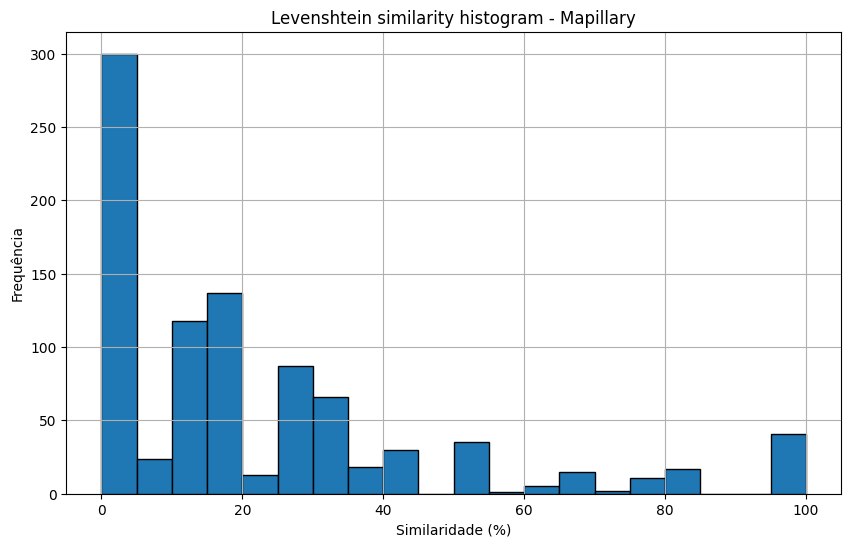

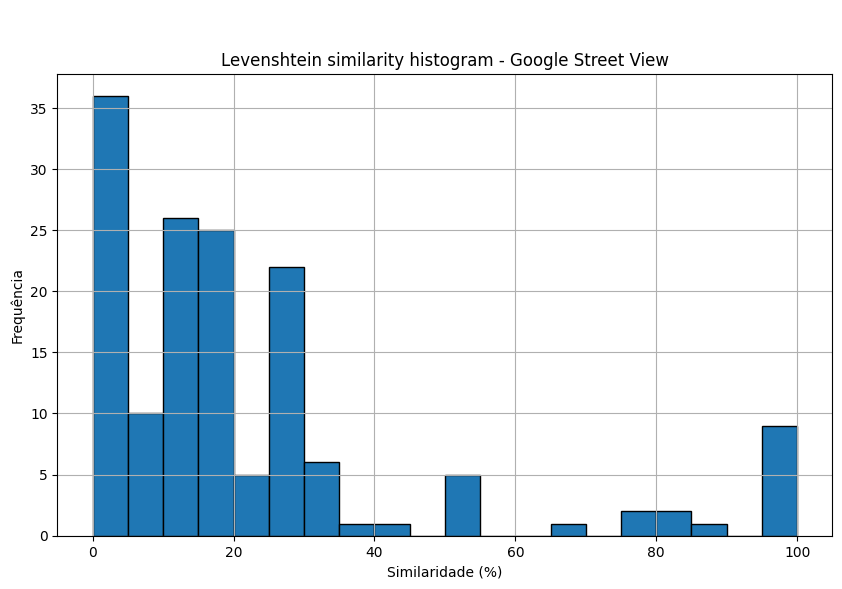

In [155]:

# Plot histograms
hist_mpl = plot_similarity_histogram(mpl_lev_results, 'Levenshtein similarity histogram - Mapillary')
hist_gsv = plot_similarity_histogram(gsv_lev_results, '\n\nLevenshtein similarity histogram - Google Street View')

# Save histograms
save_figure(hist_mpl, os.path.join(lev_results_base_path, 'fig_hist_mpl.png'), dpi=300)
save_figure(hist_gsv, os.path.join(lev_results_base_path, 'fig_hist_gsv.png'), dpi=300)

##### BoxPlot

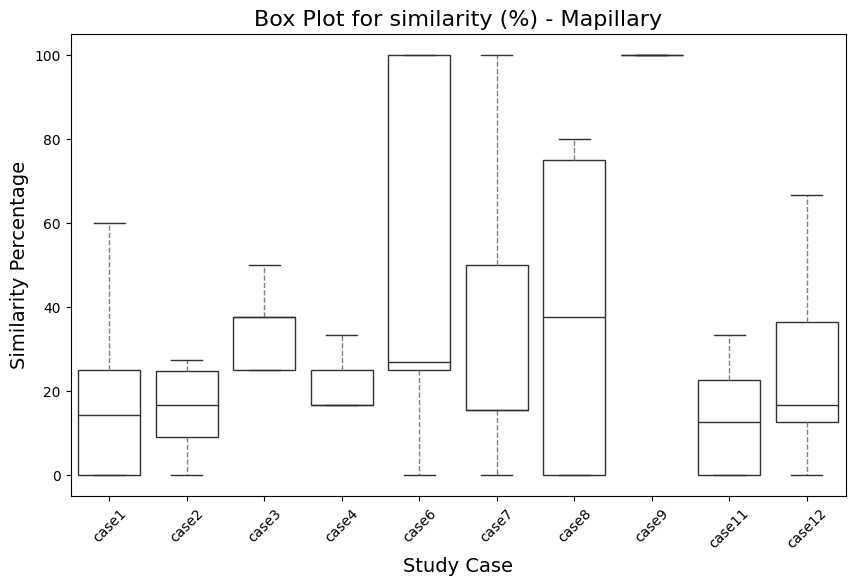

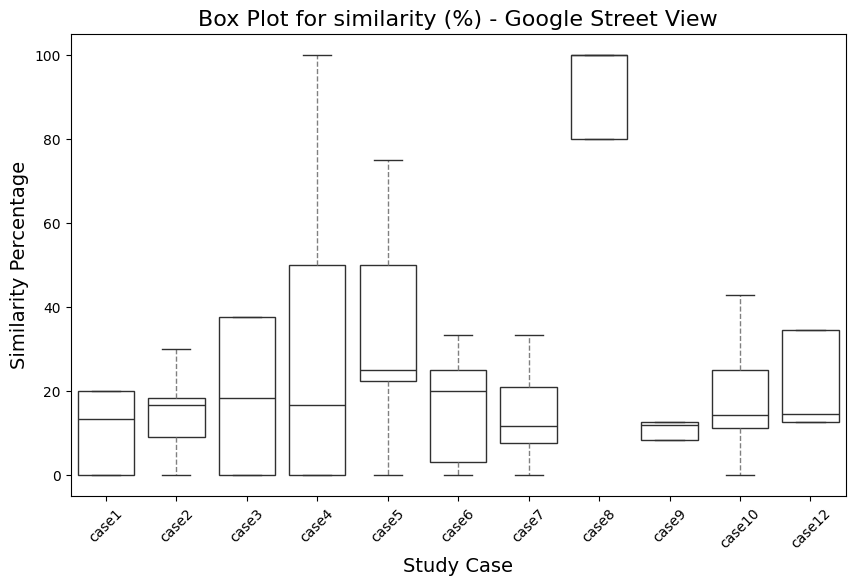

In [156]:
# Boxplot for similarity percentage
boxplot_sim_mpl = plot_box(mpl_lev_results, 'similarity_percentage', 'Box Plot for similarity (%) - Mapillary')
boxplot_sim_gsv = plot_box(gsv_lev_results, 'similarity_percentage', 'Box Plot for similarity (%) - Google Street View')

# Save the boxplots
save_figure(boxplot_sim_mpl, os.path.join(lev_results_base_path, 'fig_boxplot_sim_mpl.png'), dpi=300)
save_figure(boxplot_sim_gsv, os.path.join(lev_results_base_path, 'fig_boxplot_sim_gsv.png'), dpi=300)

##### Violin Plot

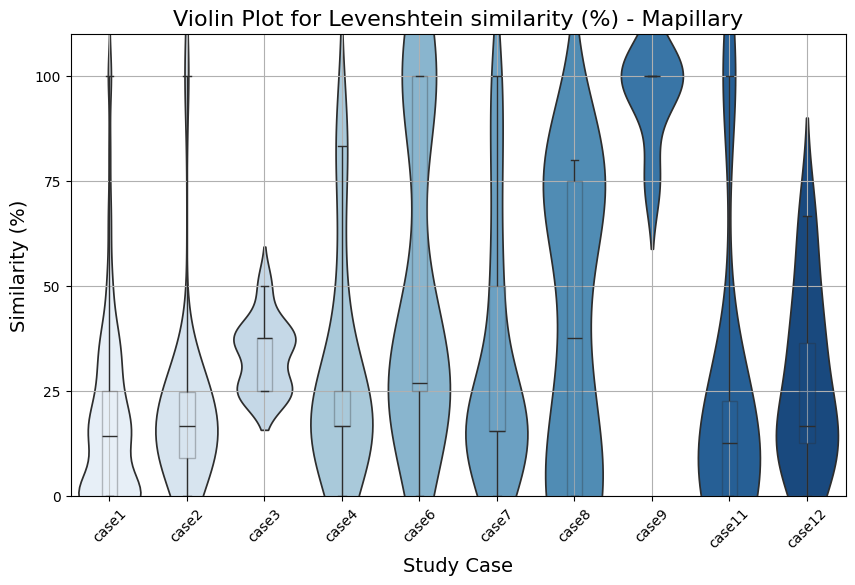

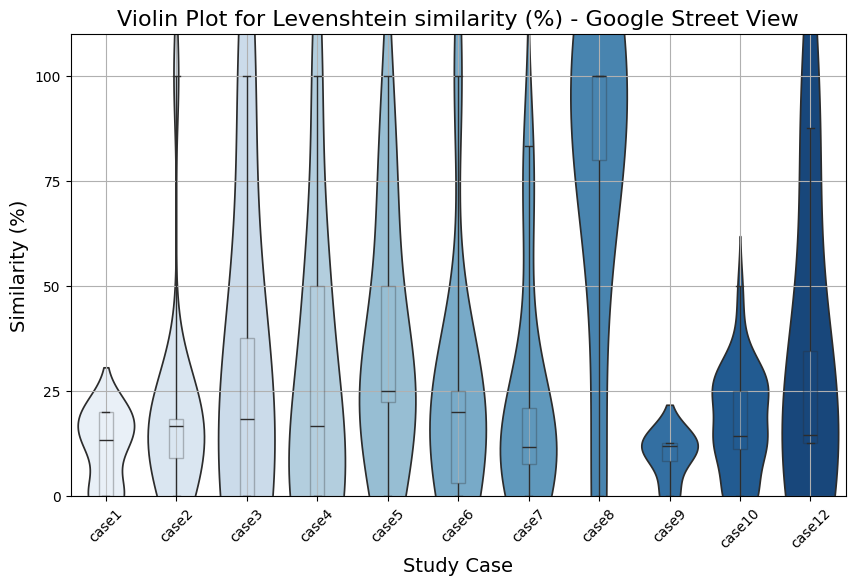

In [157]:
# Violin plot for levenshtein similarity
violin_hist_mpl = plot_similarity_violin(mpl_lev_results, 'Violin Plot for Levenshtein similarity (%) - Mapillary')
violin_hist_gsv = plot_similarity_violin(gsv_lev_results, 'Violin Plot for Levenshtein similarity (%) - Google Street View')

# Save violin plots
save_figure(violin_hist_mpl, os.path.join(lev_results_base_path, 'fig_violin_mpl.png'), dpi=300)
save_figure(violin_hist_gsv, os.path.join(lev_results_base_path, 'fig_violin_gsv.png'), dpi=300)

##### Ridgeline plot

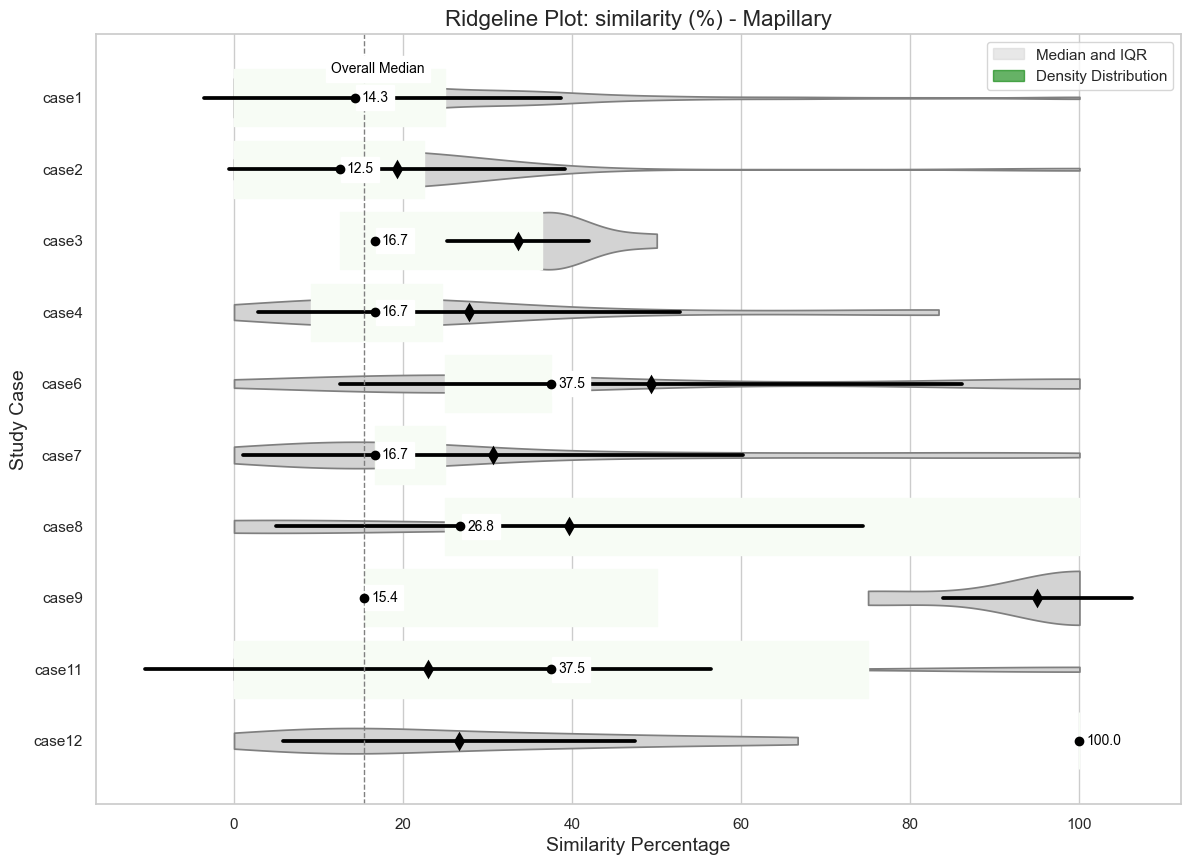

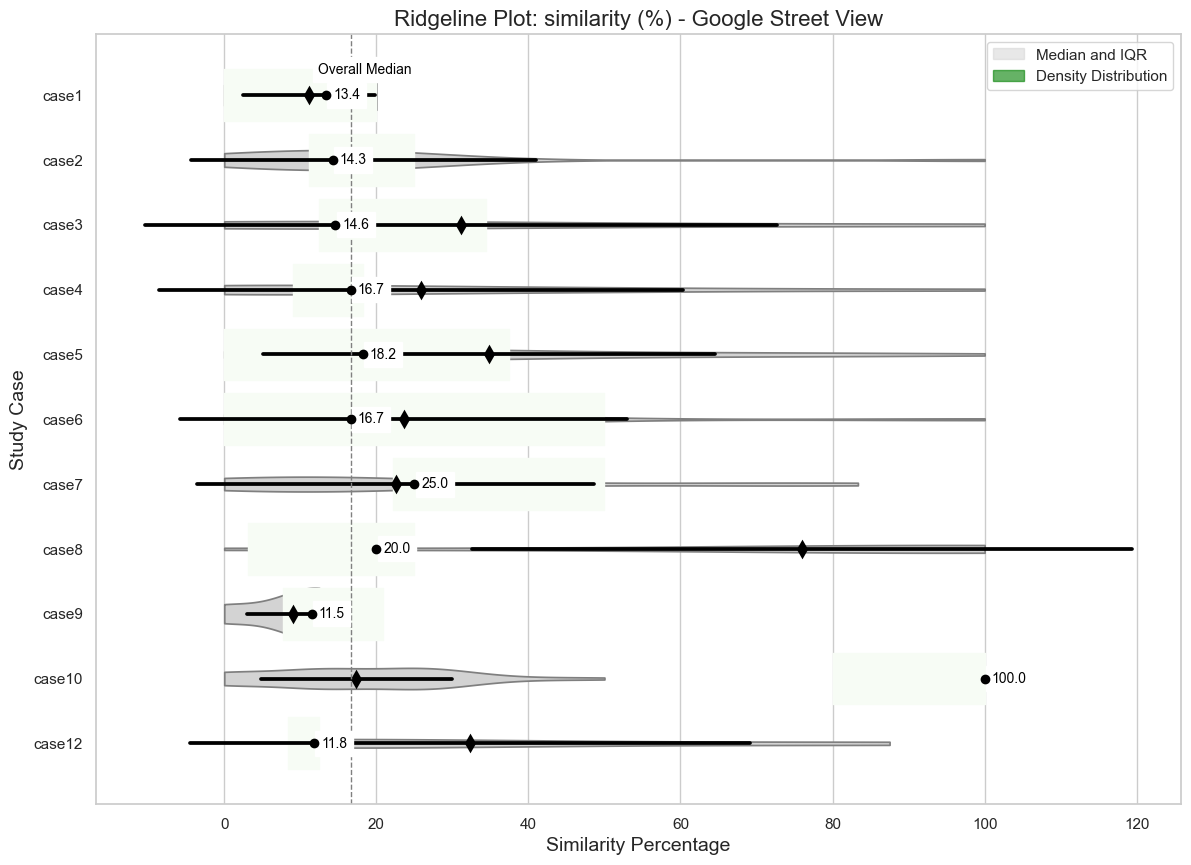

In [158]:
# Ridgeline plot for similarity percentage with labels
ridgeline_sim_mpl = plot_density_with_annotations(mpl_lev_results, 
                                                  'similarity_percentage', 'Ridgeline Plot: similarity (%) - Mapillary')
ridgeline_sim_gsv = plot_density_with_annotations(gsv_lev_results, 
                                                  'similarity_percentage', 'Ridgeline Plot: similarity (%) - Google Street View')

### Collaborative Toponyms Validation by Accumulated Evidence (ICTVAE) from subterms

In [81]:
# Display the (Geo)DataFrame results once more
columns = ['study_case', 'subcase_id',	'name',	'cleaned_name',	'cleaned_name_subterm',
           	'Text_detect_sli', 'levenshtein_distance',	'similarity_percentage']
print("Mapillary Dataframe:")
display(mpl_lev_results[columns])

print("\n\nGSV DataFrame:")
display(gsv_lev_results[columns])


Mapillary Dataframe:


,study_case,subcase_id,name,cleaned_name,cleaned_name_subterm,Text_detect_sli,levenshtein_distance,similarity_percentage
0,case1,case1.1,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,colegio,alegre,4.0,42.857143
1,case1,case1.2,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,estadual,alegre,8.0,0.000000
2,case1,case1.3,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,barao,alegre,6.0,0.000000
3,case1,case1.4,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,do,alegre,6.0,0.000000
4,case1,case1.5,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,rio,alegre,6.0,0.000000
...,...,...,...,...,...,...,...,...
915,case9,case9.1,Bradesco,bradesco,bradesco,bradesco,0.0,100.000000
916,case9,case9.1,Bradesco,bradesco,bradesco,bradesco,0.0,100.000000
917,case9,case9.1,Bradesco,bradesco,bradesco,bradesco,0.0,100.000000
918,case9,case9.1,Bradesco,bradesco,bradesco,bradesco,0.0,100.000000




GSV DataFrame:


,study_case,subcase_id,name,cleaned_name,cleaned_name_subterm,Text_detect_sli,levenshtein_distance,similarity_percentage
0,case1,case1.1,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,colegio,sulos,6.0,14.285714
1,case1,case1.2,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,estadual,sulos,7.0,12.500000
2,case1,case1.3,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,barao,sulos,5.0,0.000000
3,case1,case1.4,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,do,sulos,4.0,20.000000
4,case1,case1.5,Colégio Estadual Barão do Rio Branco,colegio estadual barao do rio branco,rio,sulos,4.0,20.000000
...,...,...,...,...,...,...,...,...
147,case8,case8.1,Itaú,itau,itau,itau,0.0,100.000000
148,case9,case9.1,Bradesco,bradesco,bradesco,uuran,7.0,12.500000
149,case9,case9.1,Bradesco,bradesco,bradesco,aliga,7.0,12.500000
150,case9,case9.1,Bradesco,bradesco,bradesco,esruluran,8.0,11.111111


In [108]:
# Save once more the "mpl_lev_results", "gsv_lev_results" as CSV files, but without images metadata

mpl_lev_results[columns].to_csv(os.path.join(lev_results_base_path, 'mpl_lev_subterms_results_noImgMeta.csv'), index=False)
gsv_lev_results[columns].to_csv(os.path.join(lev_results_base_path, 'gsv_lev_subterms_results_noImgMeta.csv'), index=False)

#### Consolidate the best similarity percentage for each subterm

In [109]:
mpl_best_sim_subterm = (
    mpl_lev_results.groupby(['study_case', 'subcase_id', 'cleaned_name_subterm'])
    .agg({'similarity_percentage': 'max'})
    .reset_index()
)
display(mpl_best_sim_subterm)

,study_case,subcase_id,cleaned_name_subterm,similarity_percentage
0,case1,case1.1,colegio,42.857143
1,case1,case1.2,estadual,37.500000
2,case1,case1.3,barao,80.000000
3,case1,case1.4,do,100.000000
4,case1,case1.5,rio,100.000000
5,case1,case1.6,branco,100.000000
6,case11,case11.1,mai,100.000000
7,case11,case11.2,museu,20.000000
8,case11,case11.3,de,0.000000
9,case11,case11.4,arte,25.000000


In [110]:
gsv_best_sim_subterm = (
    gsv_lev_results.groupby(['study_case', 'subcase_id', 'cleaned_name_subterm'])
    .agg({'similarity_percentage': 'max'})
    .reset_index()
)
display(gsv_best_sim_subterm)

,study_case,subcase_id,cleaned_name_subterm,similarity_percentage
0,case1,case1.1,colegio,14.285714
1,case1,case1.2,estadual,12.500000
2,case1,case1.3,barao,0.000000
3,case1,case1.4,do,20.000000
4,case1,case1.5,rio,20.000000
5,case1,case1.6,branco,0.000000
6,case10,case10.1,paroquia,25.000000
7,case10,case10.2,santuario,33.333333
8,case10,case10.3,sagrado,28.571429
9,case10,case10.4,coracao,50.000000


#### Aggregate Similarity Score (Average Weighted by Word Length)

This test is performed: 
- Take the best similarity of each subterm
- Calculate a weighted average by word length
- The final score tells you the overall similarity of the full name.

In [ ]:
# Aggregate Similarity Score
mpl_wighted_score = calculate_wighted_score(mpl_best_sim_subterm)
gsv_wighted_score = calculate_wighted_score(gsv_best_sim_subterm)

In [121]:
print("Aggregate Similarity Score - Mapillary:")
display(mpl_wighted_score)

print("\nAggregate Similarity Score - GSV:")
display(gsv_wighted_score)

Aggregate Similarity Score - Mapillary:


,study_case,wighted_score
0,case1,67.741935
1,case11,27.272727
2,case12,54.545455
3,case2,52.941176
4,case3,50.000000
5,case4,83.333333
6,case6,100.000000
7,case7,47.368421
8,case8,80.000000
9,case9,100.000000



Aggregate Similarity Score - GSV:


,study_case,wighted_score
0,case1,9.677419
1,case10,32.236842
2,case12,68.181818
3,case2,52.941176
4,case3,100.000000
5,case4,100.000000
6,case5,58.823529
7,case6,71.428571
8,case7,36.842105
9,case8,100.000000


#### Index of Collaborative Toponyms Validation by Accumulated Evidence (ICTVAE)

In [129]:
# Index of Collaborative Toponyms Validation by Accumulated Evidence (ICTVAE) - Mapillary
mpl_ICTVAE = calculate_ictvae(mpl_lev_results)

# Index of Collaborative Toponyms Validation by Accumulated Evidence (ICTVAE) - GSV
gsv_ICTVAE = calculate_ictvae(gsv_lev_results)


In [130]:
print("Index of Collaborative Toponyms Validation by Accumulated Evidence (ICTVAE) - Mapillary:")
display(mpl_ICTVAE)

print("\nIndex of Collaborative Toponyms Validation by Accumulated Evidence (ICTVAE) - GSV:")
display(gsv_ICTVAE)

Index of Collaborative Toponyms Validation by Accumulated Evidence (ICTVAE) - Mapillary:


,study_case,total_subterms_n,detected_subterms_D,coverage_ratio,ICTVAE
0,case1,6.0,6.0,1.0,67.741935
1,case11,5.0,4.0,0.8,21.818182
2,case12,2.0,2.0,1.0,54.545455
3,case2,2.0,2.0,1.0,52.941176
4,case3,1.0,1.0,1.0,50.000000
5,case4,1.0,1.0,1.0,83.333333
6,case6,2.0,2.0,1.0,100.000000
7,case7,2.0,2.0,1.0,47.368421
8,case8,1.0,1.0,1.0,80.000000
9,case9,1.0,1.0,1.0,100.000000



Index of Collaborative Toponyms Validation by Accumulated Evidence (ICTVAE) - GSV:


,study_case,total_subterms_n,detected_subterms_D,coverage_ratio,ICTVAE
0,case1,6.0,4.0,0.666667,6.451613
1,case10,6.0,6.0,1.000000,32.236842
2,case12,2.0,2.0,1.000000,68.181818
3,case2,2.0,2.0,1.000000,52.941176
4,case3,1.0,1.0,1.000000,100.000000
5,case4,1.0,1.0,1.000000,100.000000
6,case5,3.0,3.0,1.000000,58.823529
7,case6,2.0,2.0,1.000000,71.428571
8,case7,2.0,2.0,1.000000,36.842105
9,case8,1.0,1.0,1.000000,100.000000


In [100]:
# Save the results as CSV files
mpl_ICTVAE.to_csv(os.path.join('results/Yv11_toponyms_corr_analysis/3_evidence_from_subterms', 'mpl_ICTVAE.csv'), index=False)
gsv_ICTVAE.to_csv(os.path.join('results/Yv11_toponyms_corr_analysis/3_evidence_from_subterms','gsv_ICTVAE.csv'), index=False)

print("Results saved as CSV files!")

Results saved as CSV files!


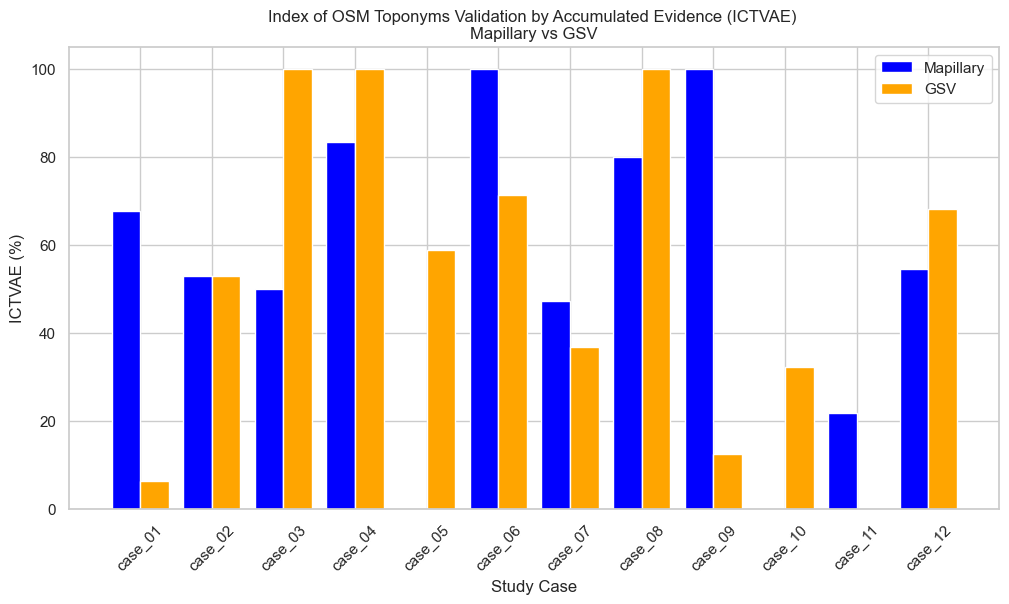

In [159]:
# Graph 1 - ICTVAE Mapillary vs GSV
# Ensure all study cases (1 to 12) are included and correctly formatted
all_study_cases = [f"case_{str(i).zfill(2)}" for i in range(1, 13)]  # Formatting as case_01, case_02, etc.

# Copy ICTVAE results for Mapillary and GSV
mpl_ICTVAE2 = mpl_ICTVAE.copy()
gsv_ICTVAE2 = gsv_ICTVAE.copy()

# Rename study_case column for consistency
mpl_ICTVAE2["study_case"]= mpl_ICTVAE2["study_case"].apply(lambda x: f"case_{int(x.replace('case', '')):02d}")
gsv_ICTVAE2["study_case"] = gsv_ICTVAE2["study_case"].apply(lambda x: f"case_{int(x.replace('case', '')):02d}")

# Create a full comparison DataFrame, ensuring all study cases are present
ICTVAE_comparison_df = pd.DataFrame({"study_case": all_study_cases}).merge(
    mpl_ICTVAE2, on="study_case", how="left"
).merge(
    gsv_ICTVAE2, on="study_case", how="left", suffixes=("_Mapillary", "_GSV")
)

# Replace NaN values with 0 for missing cases
ICTVAE_comparison_df.fillna(0, inplace=True)

# Sort study cases in ascending order
ICTVAE_comparison_df.sort_values(by="study_case", inplace=True)

# Plot configuration
fig, ax = plt.subplots(figsize=(12, 6))

# Create a grouped barplot (side-by-side comparison)
bar_width = 0.4  # Width of bars
x_positions = range(len(ICTVAE_comparison_df))

plt.bar(x_positions, ICTVAE_comparison_df["ICTVAE_Mapillary"], width=bar_width, color="blue", label="Mapillary", align="center")
plt.bar([x + bar_width for x in x_positions], ICTVAE_comparison_df["ICTVAE_GSV"], width=bar_width, color="orange", label="GSV", align="center")

# Customisation
plt.xlabel("Study Case")  # Label for the x-axis
plt.ylabel("ICTVAE (%)")  # Label for the y-axis
plt.title("Index of OSM Toponyms Validation by Accumulated Evidence (ICTVAE) \nMapillary vs GSV")  # Graph title
plt.legend()  # Display the legend
plt.xticks([x + bar_width / 2 for x in x_positions], ICTVAE_comparison_df["study_case"], rotation=45)  # Rotate x-axis labels for better readability

# Save the figure
save_figure(fig, os.path.join('results/Yv11_toponyms_corr_analysis/3_evidence_from_subterms', 'fig_ICTVAE_MPLxGSV.png'), dpi=300)


# Display the chart
plt.show()

In [160]:
ICTVAE_comparison_df

,study_case,total_subterms_n_Mapillary,detected_subterms_D_Mapillary,coverage_ratio_Mapillary,ICTVAE_Mapillary,total_subterms_n_GSV,detected_subterms_D_GSV,coverage_ratio_GSV,ICTVAE_GSV
0,case_01,6.0,6.0,1.0,67.741935,6.0,4.0,0.666667,6.451613
1,case_02,2.0,2.0,1.0,52.941176,2.0,2.0,1.000000,52.941176
2,case_03,1.0,1.0,1.0,50.000000,1.0,1.0,1.000000,100.000000
3,case_04,1.0,1.0,1.0,83.333333,1.0,1.0,1.000000,100.000000
4,case_05,0.0,0.0,0.0,0.000000,3.0,3.0,1.000000,58.823529
5,case_06,2.0,2.0,1.0,100.000000,2.0,2.0,1.000000,71.428571
6,case_07,2.0,2.0,1.0,47.368421,2.0,2.0,1.000000,36.842105
7,case_08,1.0,1.0,1.0,80.000000,1.0,1.0,1.000000,100.000000
8,case_09,1.0,1.0,1.0,100.000000,1.0,1.0,1.000000,12.500000
9,case_10,0.0,0.0,0.0,0.000000,6.0,6.0,1.000000,32.236842
